In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
i=cv2.imread("frame_23351_l.png")

In [3]:
i.shape


(273, 412, 3)

In [4]:
cv2.imshow("image",i)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

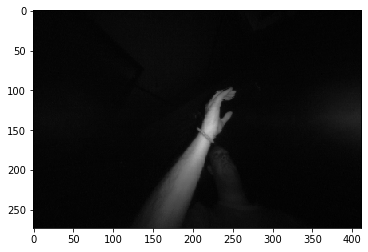

In [6]:
imgplot = plt.imshow(i)

In [7]:
i=i[70:,110:280,:]

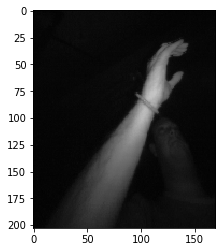

In [8]:
imgplot=plt.imshow(i)

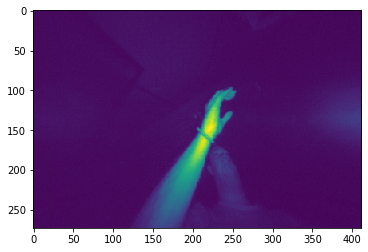

In [10]:
grayscale_img = cv2.imread("frame_23351_l.png", cv2.IMREAD_GRAYSCALE)
imgplot=plt.imshow(grayscale_img)

In [11]:
cv2.imwrite("face-" + ".jpg", grayscale_img)

True

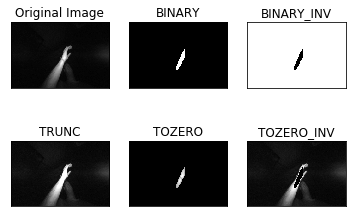

In [12]:
gi=grayscale_img

ret,thresh1 = cv2.threshold(gi,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gi,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gi,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gi,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gi,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gi, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

(273, 412)

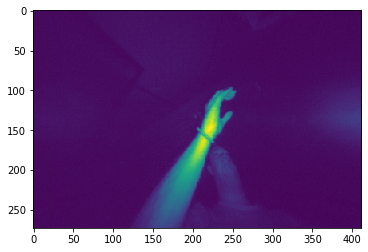

In [13]:

imgplot=plt.imshow(gi)
gi.shape

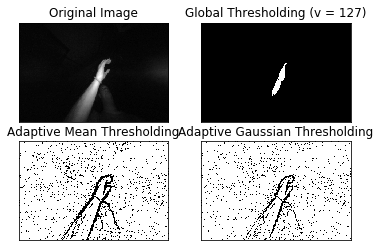

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ret,th1 = cv2.threshold(gi,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gi,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gi,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gi, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [17]:
print(gi.min())

0


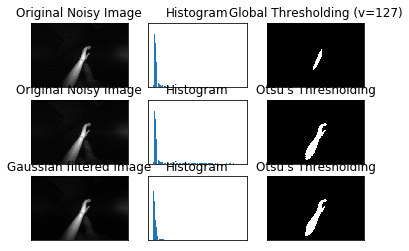

In [20]:
img = gi

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()